<a href="https://colab.research.google.com/github/leanmzr/MachineLearning-/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * 1.1 Vue d'ensemble des données :

Charger le jeu de données dans un dataframe pandas et afficher les premières lignes.



In [ ]:
import pandas as pd
df = pd.read_csv("/content/dataset.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


**Questions :**

Quelles sont les différentes colonnes du jeu de données ?


In [ ]:
for col in df.columns:
    print(col)

ID
gender
age
height(cm)
weight(kg)
waist(cm)
eyesight(left)
eyesight(right)
hearing(left)
hearing(right)
systolic
relaxation
fasting blood sugar
Cholesterol
triglyceride
HDL
LDL
hemoglobin
Urine protein
serum creatinine
AST
ALT
Gtp
oral
dental caries
tartar
smoking



Combien y a-t-il d'entrées dans le jeu de données ?



In [ ]:
entrees = len(df)

print(f'la data à {entrees} entrées.')

la data à 55702 entrées.


Le jeu de données contient-il des valeures nulles ? Si oui combien ?

In [ ]:
df.isna().sum()
df=df.dropna(how='any')

# * 1.2 Statistiques descriptives :

Générer des statistiques descriptives pour le jeu de données. Questions :

Quelle est la moyenne d'âge, de taille et de poids des fumeurs ?

In [ ]:
print("l'age moyen est : ",df.loc[df['smoking'] == 1, 'age'].mean() )
print("la taille moyenne est : ",df.loc[df['smoking'] == 1, 'height(cm)'].mean() )
print("le poid moyen est : ",df.loc[df['smoking'] == 1, 'weight(kg)'].mean() )



l'age moyen est :  43.560813453265546
la taille moyenne est :  169.4354010852031
le poid moyen est :  70.95937622213532


Y a-t-il des motifs ou des valeurs aberrantes notables dans les données ? (Un age 200 ans par exemple)

In [ ]:
print("age aberant :\n")
df.loc[(df["age"] < 10) | (df["age"] > 100), 'age']



age aberant :



55692      180.0
55693     1200.0
55694     3000.0
55695    40000.0
Name: age, dtype: float64

Quelle est l'écart type de l'hémoglobine ?

In [ ]:
print("l'ecart type de l'hémoglobine est : ",df['hemoglobin'].std())


l'ecart type de l'hémoglobine est :  1.5644757507736968


# * 1.3 Distribution de la donnée :

Combien y a-il de fumeur vs non-fumeur ? Le résultat doit être présenté sous forme de "pie chart"

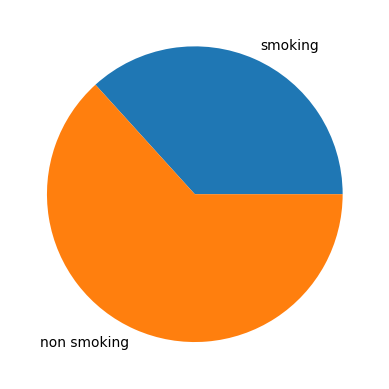

In [ ]:
import matplotlib.pyplot as plt
count =df["smoking"].value_counts()
labels= ["smoking","non smoking"]
size=[count[1],count[0]]
plt.pie(size,labels=labels)
plt.show()

Combien d'hommes? sont fumeurs ? Combien de femmes ? Afficher un histogramme

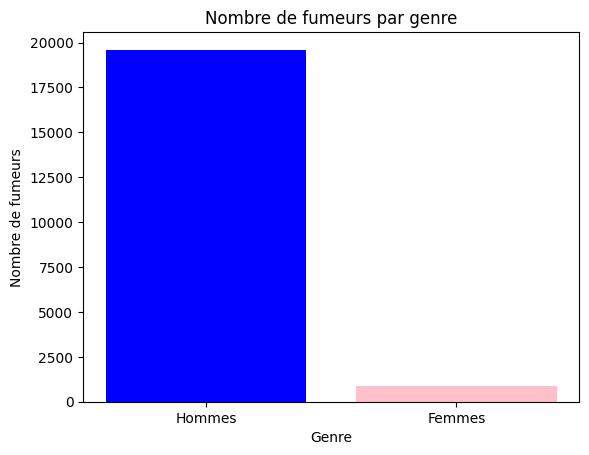

In [ ]:
hommes_fumeurs = df[(df['gender'] == 'M') & (df['smoking'] == 1)].shape[0]
femmes_fumeuses = df[(df['gender'] == 'F') & (df['smoking'] == 1)].shape[0]


categories = ['Hommes', 'Femmes']
nombre_fumeurs = [hommes_fumeurs, femmes_fumeuses]

plt.bar(categories, nombre_fumeurs, color=['blue', 'pink'])
plt.xlabel('Genre')
plt.ylabel('Nombre de fumeurs')

plt.show()

Quelle est la moyenne d'age des hommes fumeurs ?

In [ ]:
print("la moyenne d'age des hommes fumeurs est :",df[(df['gender'] == "M") & (df['smoking'] == 1)]['age'].mean())

la moyenne d'age des hommes fumeurs est : 43.437005664132265


# * 2.4 Analyse de corrélation :

Calculer et visualiser la matrice de corrélation, le but étant d'étudier la corrélation des variables entre elles. Questions :



In [ ]:
df.corr()


ValueError: could not convert string to float: 'F'

# * 2.1 Gestion des Valeurs Manquantes :

Décider d'une stratégie pour gérer les valeurs manquantes (par exemple, suppression, estimation). Implémenter la stratégie choisie.

Questions :

Quelle méthode avez-vous choisie pour gérer les valeurs manquantes et pourquoi ?

remplacer par la moyenne de cette valeur selon fummeur ou non  pour les valeurs Nan
et remplacer les string par des int


Comment cette méthode impacte-t-elle les données ?

variance plus petite
conforte de model dans sa prediction,
incertaint

string->int  ne chaneg rien


# * 2.2 Encodage des catégories

Encodez les variables en utilisant un OneHotEncorer

tartare
gender
oral

Questions :

Quel autre traitement de la donnée pourriez-vous faire pour optimiser l'entraînement ?

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:

encoder = OneHotEncoder()

# fct encoder et remplacer
def encode_and_replace(df, column):
    #transforme la colone en listes selon la liste origial
    encoded = encoder.fit_transform(df[[column]]).toarray()
    #releve le nom la colone original et les donne au autres
    columns = encoder.get_feature_names_out([column])
    df_encoded = pd.DataFrame(encoded, columns=columns)
    #tej la colone or
    df.drop(column, axis=1, inplace=True)
    #rajoute les news colone
    return pd.concat([df, df_encoded], axis=1)


df = encode_and_replace(df, 'tartar')
df = encode_and_replace(df, 'gender')
df = encode_and_replace(df, 'oral')

df.head()



,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,tartar_N,tartar_Y,gender_F,gender_M,oral_Y
0,0,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,114.0,...,18.0,19.0,27.0,0,0,0.0,1.0,1.0,0.0,1.0
1,1,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,119.0,...,22.0,19.0,18.0,0,0,0.0,1.0,1.0,0.0,1.0
2,2,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,21.0,16.0,22.0,0,1,1.0,0.0,0.0,1.0,1.0
3,3,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,19.0,26.0,18.0,0,0,0.0,1.0,0.0,1.0,1.0
4,4,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,16.0,14.0,22.0,0,0,1.0,0.0,1.0,0.0,1.0


In [ ]:
df.corr()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,tartar_N,tartar_Y,gender_F,gender_M,oral_Y
ID,1.000000,0.008014,0.006260,0.004720,0.005294,0.009605,0.003093,0.002656,-0.004979,0.002464,...,-0.001900,-0.002840,0.000777,0.000576,0.011444,-0.002460,0.002460,-0.008620,0.008620,NaN
age,0.008014,1.000000,-0.036183,-0.023614,-0.000855,-0.014966,-0.016279,0.013707,0.014034,0.010474,...,0.002108,-0.004416,0.000801,-0.010579,-0.006335,0.002502,-0.002502,0.017319,-0.017319,NaN
height(cm),0.006260,-0.036183,1.000000,0.675654,0.378907,0.151130,0.155661,-0.078658,-0.078318,0.080598,...,0.041744,0.126518,0.139728,0.079344,0.396662,-0.055504,0.055504,-0.741537,0.741537,NaN
weight(kg),0.004720,-0.023614,0.675654,1.000000,0.822852,0.108425,0.113134,-0.050084,-0.052826,0.266149,...,0.120146,0.250650,0.209644,0.073561,0.302800,-0.059930,0.059930,-0.574967,0.574967,NaN
waist(cm),0.005294,-0.000855,0.378907,0.822852,1.000000,0.027450,0.037972,0.023797,0.019294,0.316939,...,0.142706,0.252494,0.243161,0.044228,0.226295,-0.046216,0.046216,-0.419598,0.419598,NaN
eyesight(left),0.009605,-0.014966,0.151130,0.108425,0.027450,1.000000,0.354576,-0.046569,-0.048786,-0.019347,...,-0.007965,0.019324,0.003850,0.003687,0.061197,-0.012543,0.012543,-0.127401,0.127401,NaN
eyesight(right),0.003093,-0.016279,0.155661,0.113134,0.037972,0.354576,1.000000,-0.043877,-0.046623,-0.013735,...,-0.006926,0.024174,0.012187,0.016357,0.062989,-0.006556,0.006556,-0.125647,0.125647,NaN
hearing(left),0.002656,0.013707,-0.078658,-0.050084,0.023797,-0.046569,-0.043877,1.000000,0.510096,0.055219,...,0.018077,0.004823,0.012869,-0.016094,-0.023205,0.035393,-0.035393,0.009404,-0.009404,NaN
hearing(right),-0.004979,0.014034,-0.078318,-0.052826,0.019294,-0.048786,-0.046623,0.510096,1.000000,0.049096,...,0.009397,-0.005078,0.009249,-0.016369,-0.018852,0.026696,-0.026696,0.011575,-0.011575,NaN
systolic,0.002464,0.010474,0.080598,0.266149,0.316939,-0.019347,-0.013735,0.055219,0.049096,1.000000,...,0.083208,0.094902,0.165729,0.029900,0.073123,-0.006510,0.006510,-0.167335,0.167335,NaN


In [ ]:
MC=df.corr()

In [ ]:
max_corr = MC[MC != 1].max().max()
max_corr_indices = MC[MC == max_corr].stack().index.tolist()

print("Les valeurs les plus corrélées :")
for idx in max_corr_indices:
    var1, var2 = idx
    corr_value = MC.loc[var1, var2]
    print(f"{var1} et {var2} : {corr_value}")

Les valeurs les plus corrélées :
weight(kg) et waist(cm) : 0.8228519783111399
waist(cm) et weight(kg) : 0.8228519783111399


In [ ]:
smoking_corr = MC['smoking'].abs().sort_values(ascending=False)


smoking_corr = smoking_corr.drop('smoking')

top_3_corr_variables = smoking_corr.head(4)

print("Les trois variables les plus corrélées avec 'smoking' :")
print(top_3_corr_variables)

Les trois variables les plus corrélées avec 'smoking' :
gender_M      0.510346
gender_F      0.510346
hemoglobin    0.400690
height(cm)    0.396662
Name: smoking, dtype: float64


j'ai mis 4 car gender comptait pour 2

# Partie 3 :

Objectif : Choisir et entraîner plusieurs modèles de classification, ajuster les hyperparamètres et comparer les performances des modèles.

3.1 Création de jeu de test et d'entraînement

Séparez la data en 2 parties : train & test.

Questions :

Quelle proportion des données avez-vous utilisée pour l'entraînement et pour le test ?
Pourquoi est-il important de diviser les données ?

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df["smoking"]
X= df.drop('smoking',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

j'ai donné 80 % des données pour l'entraînement et donc 2à pour le test

ca permet de voir si le modèle fonctionne bien avec des nouvelles données et évite qu'il apprenne trop sur les données d'entraînement.

# 3.2 Entraînement d'un modèle simple : LogisticRegression

Entraîner un modèle de régression logistique simple sur les données d'entraînement. Questions :

Quels sont les résultats de ce modèle sur le jeu de test ?


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred=clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


<Axes: >

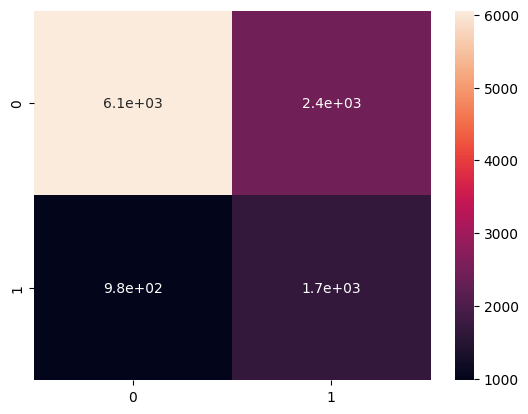

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat_result = confusion_matrix(y_pred,y_test)
sns.heatmap(confusion_mat_result,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred)

print(accuracy)

0.6934470377019749


la matrice de corelation n'est pas vraiment sous forme diagonal et l'acurracy eest pas tres haute

# 3.3 Entraîner et ajuster les paramètres de plusieurs modèles

Entraîner au moins quatre modèles différents et ajuster leurs hyperparamètres en utilisant GridSearchCV.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) #model
neigh.fit(X_train, y_train) # entrainement de model, le meme pour tout les algos


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predknn=neigh.predict(X_test)
print(y_predknn)

[0 0 1 ... 1 1 0]


<Axes: >

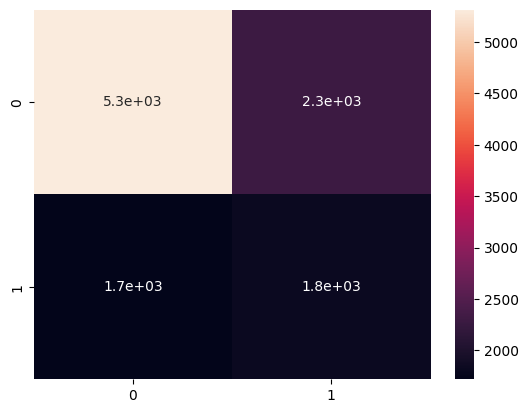

In [ ]:
confusion_mat_resultknn = confusion_matrix(y_predknn,y_test)
sns.heatmap(confusion_mat_resultknn,annot=True)

In [ ]:
accuracyknn=accuracy_score(y_test, y_predknn)

print(accuracyknn)

0.6409335727109515


moins bien

In [ ]:
from sklearn import tree
clft = tree.DecisionTreeClassifier()
clft = clft.fit(X_train, y_train)

In [ ]:
y_pred_tree=clf.predict(X_test)
print(y_pred_tree)

[0 0 0 ... 0 1 0]


0.6934470377019749


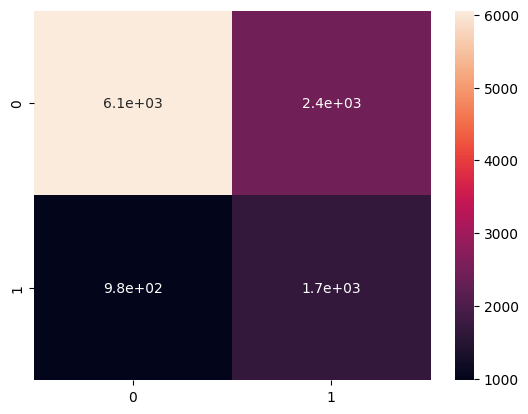

In [ ]:
confusion_mat_result_tree = confusion_matrix(y_pred_tree,y_test)
sns.heatmap(confusion_mat_result_tree,annot=True)
accuracytree=accuracy_score(y_test, y_pred_tree)
print(accuracytree)

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clfgrad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clfgrad.score(X_test, y_test)

0.7625673249551167

# hyper parmetre :

In [ ]:
from sklearn.model_selection import  RandomizedSearchCV
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2'],  # Type de régularisation
    'solver': ['liblinear', 'saga']  # Algorithme de résolution
}

clf = LogisticRegression(random_state=0)
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Précision sur l'ensemble de test :", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not co

Meilleurs hyperparamètres trouvés :
{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Précision sur l'ensemble de test : 0.7432675044883303


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Nombre de voisins à considérer
    'weights': ['uniform', 'distance'],  # Poids de la distance des voisins
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrique de distance
}

neigh = KNeighborsClassifier()
random_search = RandomizedSearchCV(estimator=neigh, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :")
print(random_search.best_params_)

accuracy = random_search.score(X_test, y_test)
print("Précision sur l'ensemble de test :", accuracy)

Meilleurs hyperparamètres trouvés :
{'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Précision sur l'ensemble de test : 0.681149012567325
